In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os
import matplotlib
import csv
matplotlib.rcParams['figure.figsize'] = (20, 10)

## Change the path to the extracted recording

In [2]:
# path = "/media/pc/Data/bag-extractor/output/2022-01-17-32-33/smartphone_video_frames"
path = "/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames"


In [3]:
def find_lines(img1, img2):
    sift = cv2.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    pts1 = []
    pts2 = []
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.8*n.distance:
            pts2.append(kp2[m.trainIdx].pt)
            pts1.append(kp1[m.queryIdx].pt)

    pts1 = np.int32(pts1)
    pts2 = np.int32(pts2)
    F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
    # We select only inlier points
    pts1 = pts1[mask.ravel()==1]
    pts2 = pts2[mask.ravel()==1]

    # FIND epilines

    lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
    lines1 = lines1.reshape(-1,3)
    img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
    # Find epilines corresponding to points in left image (first image) and
    # drawing its lines on right image
    lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
    lines2 = lines2.reshape(-1,3)
    img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
    plt.subplot(121),plt.imshow(img5)
    plt.subplot(122),plt.imshow(img3)
    plt.show()
    return lines2, pts1, pts2

In [4]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
   
    img1 = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY) 
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

In [5]:
pathL = os.path.join(path, 'left')
pathR = os.path.join(path, 'right')

In [6]:
CH_W = 8
CH_H = 6
EVERY_NTH_FRAME = 1
# Square size in m
SQUARE_SIZE = 0.05
# Termination criteria for refining the detected corners (taken from openCV docs as reasonable params)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/left/142260132053.png
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/right/142260132053.png
Time difference: -9000 ns
[[497.86563 811.0583 ]] - [[182.70667 779.8151 ]]
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/left/142360122861.png
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/right/142360122861.png
Time difference: -307 ns
[[485.22482 800.68854]] - [[167.64392 769.72614]]
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/left/143226647937.png
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/right/143226647937.png
Time difference: -4346 ns
[[389.68085 742.8211 ]] - [[ 72.58043 713.65924]]
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/left/144459776513.png
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/

[[487.0883  852.51227]] - [[246.51   821.4796]]
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/left/198951043820.png
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/right/198951043820.png
Time difference: -9808 ns
[[447.72293 780.252  ]] - [[209.93025 750.7397 ]]
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/left/200384144934.png
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/right/200384144934.png
Time difference: -9693 ns
[[1138.6097   490.51532]] - [[890.7793 451.6416]]
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/left/200484136127.png
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/right/200484136127.png
Time difference: -4846 ns
[[1129.8544   484.38055]] - [[884.4896 445.6988]]
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/left/204216874432.png
/media/

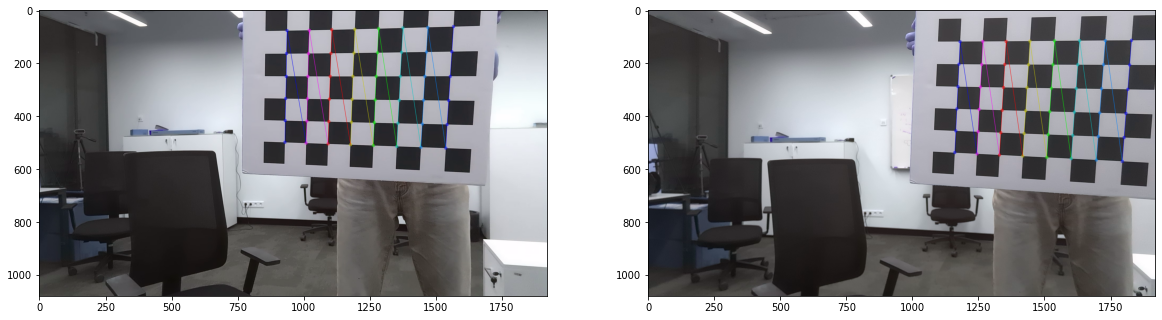

/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/left/243743860942.png
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/right/243743860942.png
Time difference: -9231 ns
[[1836.506   122.4626]] - [[932.34186 503.98245]]
AGIAN A MISMATCH. ANOTHER HUMAN IS DEAD


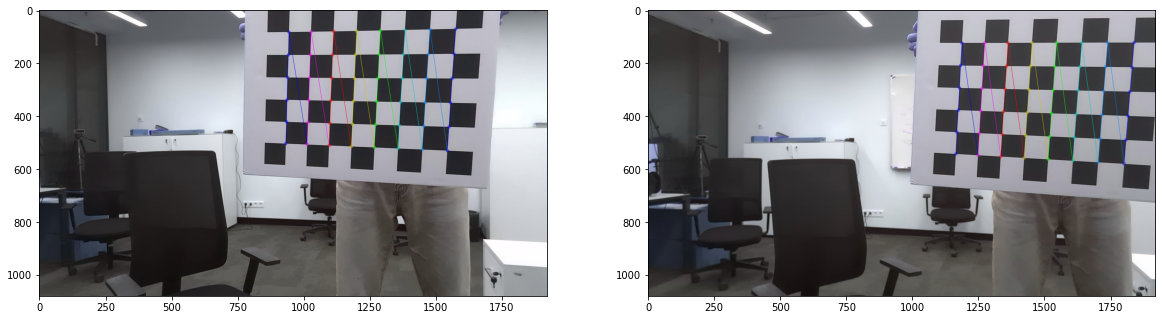

/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/left/245043654787.png
/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/right/245043654787.png
Time difference: -6154 ns


In [7]:


objp = np.zeros((CH_H*CH_W,3), np.float32)
objp[:,:2] = np.mgrid[0:CH_H,0:CH_W].T.reshape(-1,2)
objp *= SQUARE_SIZE

def read_rotate(path, bw):
    if (bw == 0):
        img = cv2.imread(path, 0)
    else:
        img = cv2.imread(path, 1)
    return cv2.rotate(img, cv2.ROTATE_180)

img_ptsL = []
img_ptsR = []
obj_pts = []
counter = 0

with open(os.path.join(path, 'match.csv')) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        counter += 1
        if counter % EVERY_NTH_FRAME == 0 and counter != 1 and abs(int(row[2]) - int(row[1])) < 10000:
            print(f'{pathL}/{row[2]}.png')

            print(f'{pathR}/{row[2]}.png')
            imgL = read_rotate(os.path.join(pathL, f'{row[1]}.png'), 1)
            imgR = read_rotate(os.path.join(pathR, f'{row[2]}.png'), 1)
            print(f'Time difference: {int(row[2]) - int(row[1])} ns')
            imgL_gray = read_rotate(os.path.join(pathL, f'{row[1]}.png'),0)
            imgR_gray = read_rotate(os.path.join(pathR, f'{row[2]}.png'),0)

            outputL = imgL.copy()
            outputR = imgR.copy()

            retR, cornersR =  cv2.findChessboardCorners(outputR,(CH_H,CH_W),None)
            retL, cornersL = cv2.findChessboardCorners(outputL,(CH_H,CH_W),None)

            if retR and retL:
                obj_pts.append(objp)
                cv2.cornerSubPix(imgR_gray,cornersR,(11,11),(-1,-1),criteria)
                cv2.cornerSubPix(imgL_gray,cornersL,(11,11),(-1,-1),criteria)

                print(f'{cornersL[0]} - {cornersR[0]}')


#                     cv2.drawChessboardCorners(outputR,(CH_H,CH_W),cornersR,retR)
#                     plt.subplot(1,2,1)
#                     plt.imshow(outputR)
#                     cv2.drawChessboardCorners(outputL,(CH_H,CH_W),cornersL,retL)
#                     plt.subplot(1,2,2)
                    
#                     plt.imshow(outputL)
#                     plt.show()
#                     print("MISMATCH. HUMAN IS DEAD")
#                     cornersR = np.flip(cornersR, 0)
                    
#                     cv2.drawChessboardCorners(outputR,(CH_H,CH_W),cornersR,retR)
#                     plt.subplot(1,2,1)
#                     plt.imshow(outputR)
#                     cv2.drawChessboardCorners(outputL,(CH_H,CH_W),cornersL,retL)
#                     plt.subplot(1,2,2)

#                     plt.imshow(outputL)
#                     plt.show()

                anchor_is_right = (cornersL[0][0,0] - cornersL[-1][0,0]) > 0
                is_right = (cornersR[0][0,0] - cornersR[-1][0,0]) > 0

                if anchor_is_right != is_right:
                    print("AGIAN A MISMATCH. ANOTHER HUMAN IS DEAD")
                    cornersR = np.flip(cornersR, 0)
                    
                    cv2.drawChessboardCorners(outputR,(CH_H,CH_W),cornersR,retR)
                    plt.subplot(1,2,1)
                    plt.imshow(outputR)
                    cv2.drawChessboardCorners(outputL,(CH_H,CH_W),cornersL,retL)
                    plt.subplot(1,2,2)

                    plt.imshow(outputL)
                    plt.show()
                
                anchor_is_bottom = (cornersL[0][0,1] - cornersL[-1][0,1]) > 0
                is_bottom = (cornersR[0][0,1] - cornersR[-1][0,1]) > 0

                
                if anchor_is_bottom != is_bottom:
                    print("WTF!!!!!!!!!!!!!!!!!!!!!!!!!!!")
                
                img_ptsL.append(cornersL)
                img_ptsR.append(cornersR)

#                 if counter < 500:
#                     cv2.drawChessboardCorners(outputR,(CH_H,CH_W),cornersR,retR)
#                     plt.subplot(1,2,1)
#                     plt.imshow(outputR)
#                     cv2.drawChessboardCorners(outputL,(CH_H,CH_W),cornersL,retL)
#                     plt.subplot(1,2,2)

#                     plt.imshow(outputL)
#                     plt.show()

# Calibrating left camera
retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(obj_pts,img_ptsL,imgL_gray.shape[::-1],None,None)

hL,wL= imgL_gray.shape[:2]
new_mtxL, roiL= cv2.getOptimalNewCameraMatrix(mtxL,distL,(wL,hL),1,(wL,hL))

# Calibrating right camera
retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(obj_pts,img_ptsR,imgR_gray.shape[::-1],None,None)

hR,wR= imgR_gray.shape[:2]
new_mtxR, roiR= cv2.getOptimalNewCameraMatrix(mtxR,distR,(wR,hR),1,(wR,hR))

In [8]:
mtxR

array([[1.44202140e+03, 0.00000000e+00, 9.56108708e+02],
       [0.00000000e+00, 1.44654519e+03, 5.26037648e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [9]:
distL

array([[ 0.03220824,  0.04381164, -0.00159229, -0.00076361, -0.12319342]])

In [10]:
mtxL

array([[1.44763523e+03, 0.00000000e+00, 9.60421778e+02],
       [0.00000000e+00, 1.45261291e+03, 5.21425549e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [11]:
np.savez("intrinsic_data_left", mtx=mtxL, dist=distL, rvecs=rvecsL, tvecs=tvecsL)
np.savez("intrinsic_data_right", mtx=mtxR, dist=distR, rvecs=rvecsR, tvecs=tvecsR)

# Stereo calibration

In [12]:
tmpD = distL
tmpM = mtxL


In [13]:
flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC 
flags |= cv2.CALIB_USE_INTRINSIC_GUESS
flags |= cv2.CALIB_FIX_FOCAL_LENGTH
flags |= cv2.CALIB_FIX_PRINCIPAL_POINT
criteria_stereo= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

retS, new_mtxL, distL, new_mtxR, distR, Rot, Trns, Emat, Fmat = cv2.stereoCalibrate(obj_pts, img_ptsL, img_ptsR, mtxL, distL, mtxR, distR, imgL_gray.shape[::-1], criteria_stereo, flags)

In [14]:
from utils.io_utils_f import get_images, save_intrinsics_calib
calib_name = 's20_wide'

save_intrinsics_calib(calib_name, mtxL, distL, mtxL)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Saved calibration results as multiview-camera-depth-calibration/calib_output/s20_wide_intrinsics.npy


In [15]:
new_mtxL

array([[1.44763523e+03, 0.00000000e+00, 9.60421778e+02],
       [0.00000000e+00, 1.45261291e+03, 5.21425549e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [16]:
distL

array([[ 0.03220824,  0.04381164, -0.00159229, -0.00076361, -0.12319342]])

In [17]:
rectify_scale=1
rect_l, rect_r, proj_mat_l, proj_mat_r, Q, roiL, roiR= cv2.stereoRectify(new_mtxL, distL, new_mtxR, distR, imgL_gray.shape[::-1], Rot, Trns, rectify_scale,(0,0))

In [18]:
print(rect_l)
print("---")
print(proj_mat_l)
print(new_mtxL)
print(roiL)
print(Q)

roi = np.array([0, 19, 1913, 1020])
roi/3


[[ 0.99962275  0.02562861 -0.00987556]
 [-0.02575785  0.9995812  -0.01318935]
 [ 0.0095334   0.01343875  0.99986425]]
---
[[1.44957905e+03 0.00000000e+00 9.78359161e+02 0.00000000e+00]
 [0.00000000e+00 1.44957905e+03 5.21515831e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]
[[1.44763523e+03 0.00000000e+00 9.60421778e+02]
 [0.00000000e+00 1.45261291e+03 5.21425549e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
(26, 9, 1875, 1017)
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -9.78359161e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -5.21515831e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.44957905e+03]
 [ 0.00000000e+00  0.00000000e+00  7.19065313e+00 -0.00000000e+00]]


array([  0.        ,   6.33333333, 637.66666667, 340.        ])

In [19]:
np.savez("extrinsic_data", Q=Q, rect_l=rect_l, distL=distL, proj_mat_l=proj_mat_l, new_mtxL=new_mtxL,
        rect_r=rect_r, distR=distR, proj_mat_r=proj_mat_r, new_mtxR=new_mtxR)

## stereoCalibrate retval

According to the docs, represents the final value of the re-projection error.


In [20]:
retS

0.28552543918287715

In [21]:
Trns

array([[-0.13905424],
       [-0.0013591 ],
       [ 0.00154168]])

 - **this translation value is off by a few mm from real-world situation (measured by a ruler), although the returned reproj error is not that big?**
 
 Should be something like: (-98, ~0, ~8)

In [22]:
Q

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -9.78359161e+02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -5.21515831e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.44957905e+03],
       [ 0.00000000e+00,  0.00000000e+00,  7.19065313e+00,
        -0.00000000e+00]])

In [23]:
Left_Stereo_Map= cv2.initUndistortRectifyMap(new_mtxL, distL, rect_l, proj_mat_l,
                                             imgL_gray.shape[::-1], cv2.CV_16SC2)
Right_Stereo_Map= cv2.initUndistortRectifyMap(new_mtxR, distR, rect_r, proj_mat_r,
                                              imgR_gray.shape[::-1], cv2.CV_16SC2)

print("Saving parameters ......")
cv_file = cv2.FileStorage("improved_params2.xml", cv2.FILE_STORAGE_WRITE)
cv_file.write("Left_Stereo_Map_x",Left_Stereo_Map[0])
cv_file.write("Left_Stereo_Map_y",Left_Stereo_Map[1])
cv_file.write("Right_Stereo_Map_x",Right_Stereo_Map[0])
cv_file.write("Right_Stereo_Map_y",Right_Stereo_Map[1])
cv_file.write("Trns",Trns)
cv_file.release()

Saving parameters ......


In [24]:
proj_mat_l/3.0

array([[4.83193017e+02, 0.00000000e+00, 3.26119720e+02, 0.00000000e+00],
       [0.00000000e+00, 4.83193017e+02, 1.73838610e+02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.33333333e-01, 0.00000000e+00]])

In [25]:
def rect(imgL, imgR):
    imgL_rectified=cv2.remap(imgL,Left_Stereo_Map[0],Left_Stereo_Map[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
    imgR_rectified=cv2.remap(imgR,Right_Stereo_Map[0],Right_Stereo_Map[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
    fig, axes = plt.subplots(1, 2, figsize=(50, 20))
    axes[0].imshow(imgL_rectified, cmap="gray")
    axes[1].imshow(imgR_rectified, cmap="gray")
    for i in range(100, 1200, 100):
        axes[0].axhline(i)
        axes[1].axhline(i)

    plt.suptitle("Rectified images")
    plt.show()
    return (imgL_rectified, imgR_rectified)

In [26]:
counter = 0
with open(os.path.join(path, 'match.csv')) as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        counter += 1
        if counter == 200:
            print(f'{pathR}/{row[2]}.png')
            imgL = read_rotate(os.path.join(pathL, f'{row[1]}.png'), 1)
            imgR = read_rotate(os.path.join(pathR, f'{row[2]}.png'), 1)

/media/pc/Data/bag-extractor/output/2022-01-27-17-32-33/smartphone_video_frames/right/152325176777.png


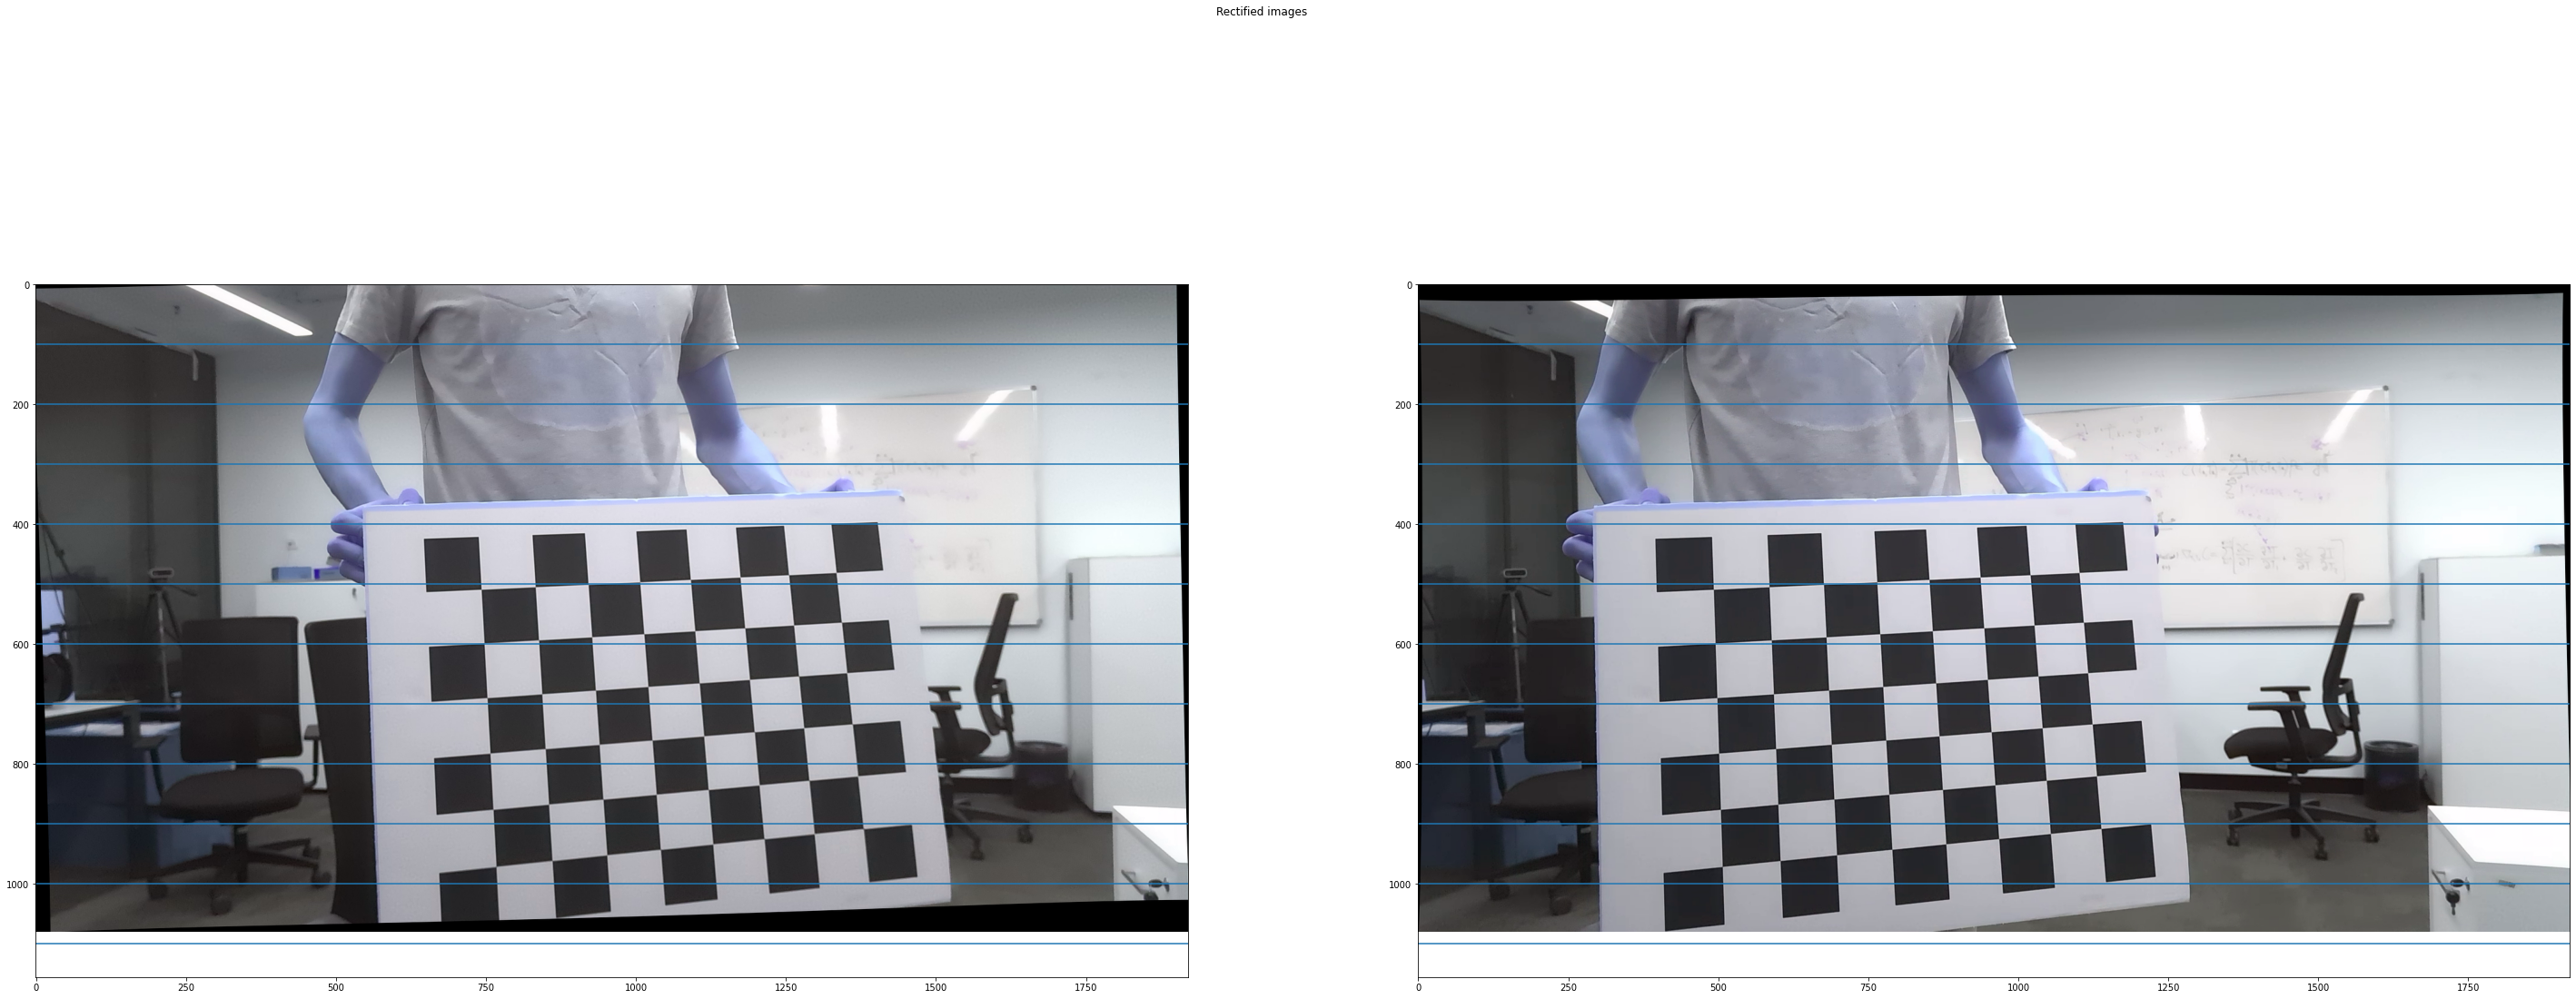

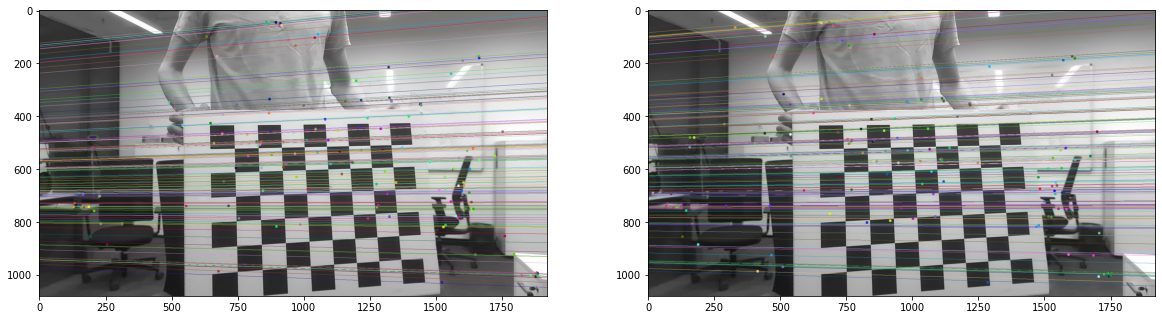

(array([[[100, 100, 100],
         [100, 100, 100],
         [100, 100, 100],
         ...,
         [123, 123, 123],
         [122, 122, 122],
         [122, 122, 122]],
 
        [[100, 100, 100],
         [100, 100, 100],
         [100, 100, 100],
         ...,
         [124, 124, 124],
         [121, 121, 121],
         [122, 122, 122]],
 
        [[100, 100, 100],
         [100, 100, 100],
         [100, 100, 100],
         ...,
         [124, 124, 124],
         [124, 124, 124],
         [121, 121, 121]],
 
        ...,
 
        [[ 74,  74,  74],
         [ 77,  77,  77],
         [ 74,  74,  74],
         ...,
         [165, 165, 165],
         [160, 160, 160],
         [162, 162, 162]],
 
        [[ 77,  77,  77],
         [ 74,  74,  74],
         [ 77,  77,  77],
         ...,
         [163, 163, 163],
         [160, 160, 160],
         [162, 162, 162]],
 
        [[ 77,  77,  77],
         [ 77,  77,  77],
         [ 74,  74,  74],
         ...,
         [164, 164, 164],
  

In [27]:
img1, img2 = rect(imgL, imgR)
lines, pts1, pts2 = find_lines(img1, img2)

drawlines(img2,img1,lines,pts2,pts1)